In [1]:
import time
time.ctime()

'Thu Sep 21 11:08:04 2023'

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import importlib as il
import glob
import itertools as it
import random
import warnings
import collections
import dill

from scipy import optimize


%load_ext ipydex.displaytools
%matplotlib inline


In [4]:
import stage_2a_bar_selection as bs
il.reload(bs)
from stage_2a_bar_selection import (
    load_img,
    rgb,
    get_bbox_list,
    assign_row_col,
    index_combinations,
    find_missing_boxes,
    handle_missing_boxes,
    select_bar_from_file,
    get_raw_cell,
    get_angle,
    correct_angle,
    rotate_img,
    Container,
)


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
vv = {"vmin": 0, "vmax": 255}


In [5]:
img_dir = "/home/ck/mnt/XAI-DIA-gl/Carsten/bilder_jpg2a/cropped/chunk000_stage1_completed/C0"
img_path_list = glob.glob(f"{img_dir}/*.jpg")
img_path_list.sort()

hist_dict_path = "dicts"
total_res_fpath = f"{hist_dict_path}/_total_res.dill"
hist_dict_list = glob.glob(f"{hist_dict_path}/hist_*.dill")
hist_dict_list.sort()

area1=10.085201114179803, area2=7.34629907133412
/home/ck/mnt/XAI-DIA-gl/Carsten/bilder_jpg2a/cropped/chunk000_stage1_completed/C0/2023-06-26_06-21-53_C50.jpg ('a', '6') 17.431500185513922


(dc.criticality_score) := 17.431500185513922

---

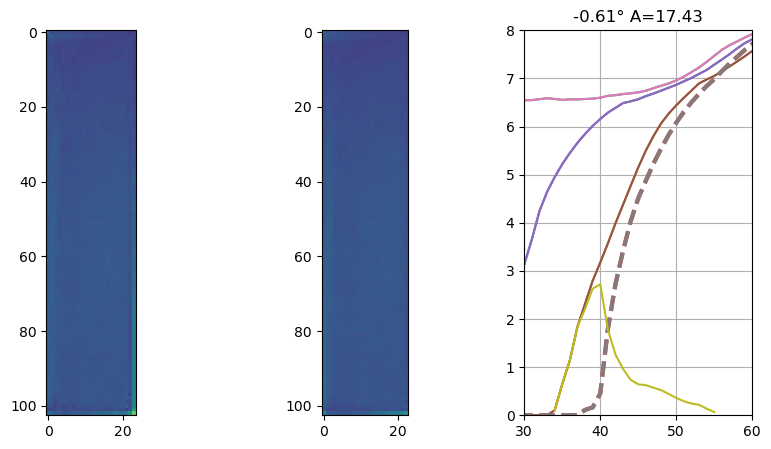

In [87]:
il.reload(bs)
fpath = "/home/ck/mnt/XAI-DIA-gl/Carsten/bilder_jpg2a/cropped/chunk000_stage1_completed/C0/2023-06-26_06-21-53_C50.jpg"
dict_fpath = "dicts/hist_2023-06-26_06-21-53_C50.dill"

tup = ("a", "6")
ccia = bs.CavityCarrierImageAnalyzier(fpath)
cell = ccia.get_corrected_cell(*tup)
_, h1 = bs.get_symlog_hist(fpath, delta=1, *tup)


he = bs.HistEvaluation()

# he.find_critical_cells_for_hist_dict(dict_fpath)
with open(dict_fpath, "rb") as fp:
    hist_dict = dill.load(fp)

dc = Container()
he.evaluate_cell(fpath, tup, hist_dict, dc, plot="show", force_plot=True)

dc.criticality_score ##:

q = dc.q

plt.plot(dc.q.ii, dc.q.mid)
plt.plot(dc.q.ii, dc.q.lower)
plt.plot(dc.q.ii, dc.q.upper)
plt.plot(dc.q.ii, dc.cell_hist, alpha=0.9, lw=3, ls="--")
plt.plot(dc.q.ii[dc.mask1*dc.dark_mask], dc.diff1_dark)
plt.axis([30, 60, 0, 8])
plt.grid()

/home/ck/mnt/XAI-DIA-gl/Carsten/bilder_jpg2a/cropped/chunk000_stage1_completed/C0/2023-06-26_06-19-58_C50.jpg ('b', '3') 24.097277251133086


(dc.criticality_container.score) := 24.097277251133086

---

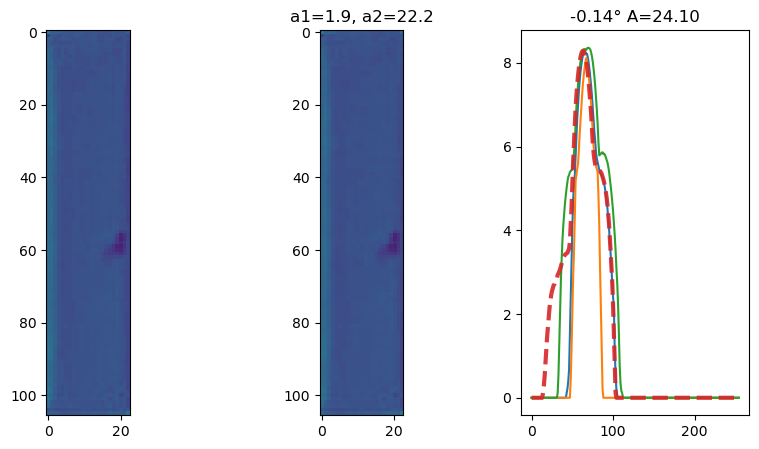

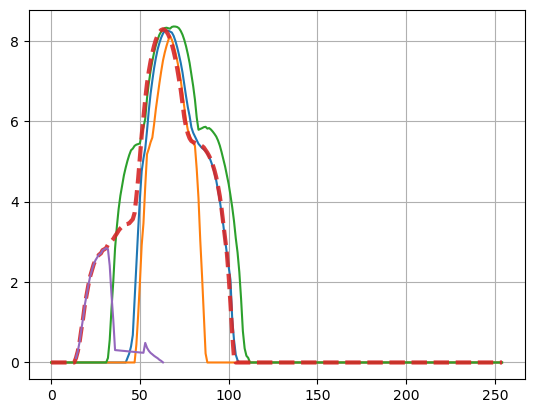

In [93]:
il.reload(bs)
fpath = "/home/ck/mnt/XAI-DIA-gl/Carsten/bilder_jpg2a/cropped/chunk000_stage1_completed/C0/2023-06-26_06-19-58_C50.jpg"
dict_fpath = "dicts/hist_2023-06-26_06-19-58_C50.dill"

tup = ("b", "3")
ccia = bs.CavityCarrierImageAnalyzier(fpath)
cell = ccia.get_corrected_cell(*tup)
_, h1 = bs.get_symlog_hist(fpath, delta=1, *tup)


he = bs.HistEvaluation()

# he.find_critical_cells_for_hist_dict(dict_fpath)
with open(dict_fpath, "rb") as fp:
    hist_dict = dill.load(fp)

dc = Container()
he.evaluate_cell(fpath, tup, hist_dict, dc, plot="show")

dc.criticality_container.score ##:

if 1:
    q = dc.q

    plt.figure()    
    plt.plot(dc.q.ii, dc.q.mid)
    plt.plot(dc.q.ii, dc.q.lower)
    plt.plot(dc.q.ii, dc.q.upper)
    plt.plot(dc.q.ii, dc.cell_hist, alpha=0.9, lw=3, ls="--")


plt.plot(dc.q.ii[dc.mask2*dc.dark_mask], dc.diff2_dark)
# plt.axis([0, 60, 0, 8])
plt.grid()

## Check angle plausibility

/home/ck/mnt/XAI-DIA-gl/Carsten/bilder_jpg2a/cropped/chunk000_stage1_completed/C0/2023-06-26_06-19-58_C50.jpg ('a', '24') 41.97314879963159


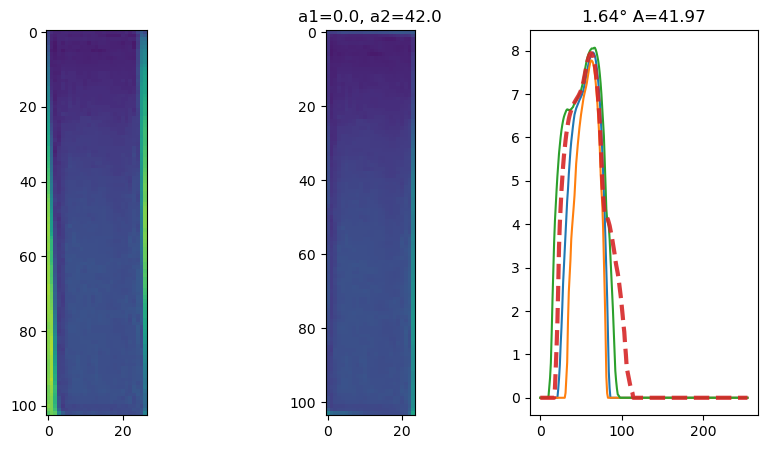

In [95]:
basename = "2023-06-26_06-19-14_C50"
img_fpath = f"/home/ck/mnt/XAI-DIA-gl/Carsten/bilder_jpg2a/cropped/chunk000_stage1_completed/C0/{basename}.jpg"


dict_fpath = f"dicts/hist_{basename}.dill"
tup = ("a", "24")
ccia = bs.CavityCarrierImageAnalyzier(fpath)
cell = ccia.get_corrected_cell(*tup)
_, h1 = bs.get_symlog_hist(fpath, delta=1, *tup)


he = bs.HistEvaluation()

# he.find_critical_cells_for_hist_dict(dict_fpath)
with open(dict_fpath, "rb") as fp:
    hist_dict = dill.load(fp)

dc = Container()
he.evaluate_cell(fpath, tup, hist_dict, dc, plot="show")


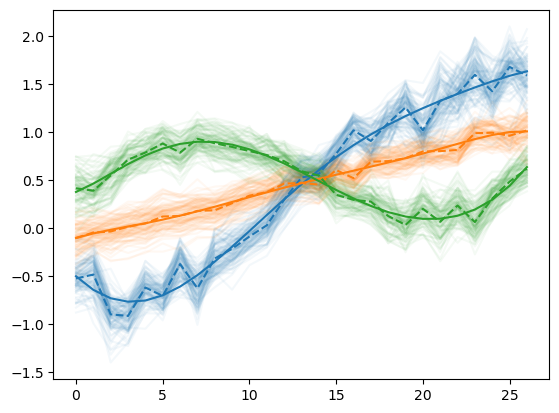

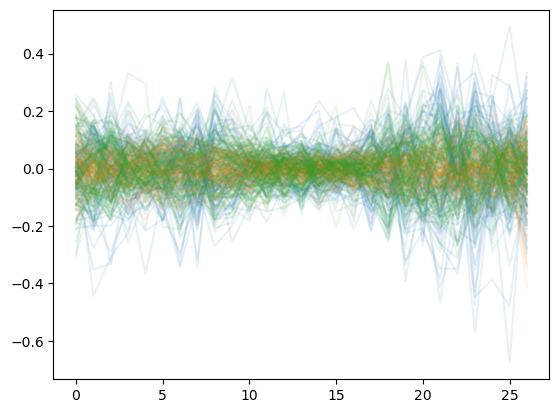

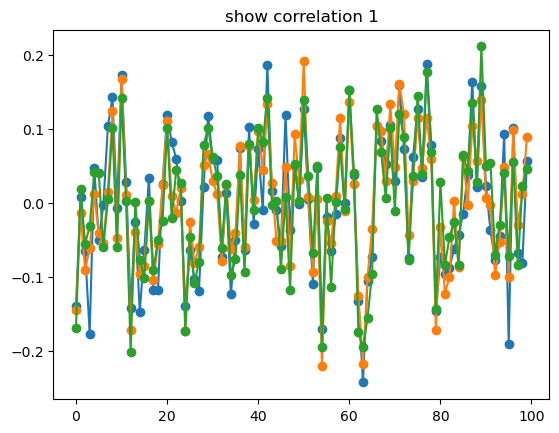

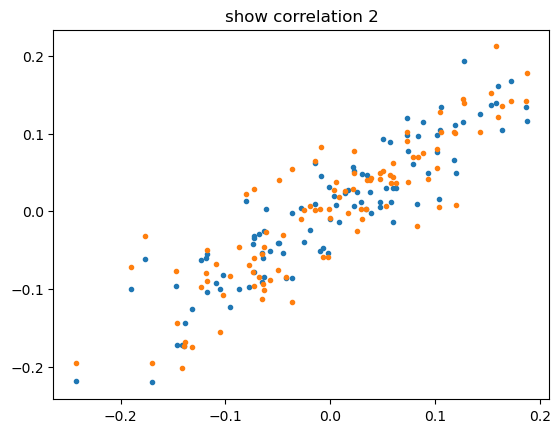

In [171]:
il.reload(bs)
        
            

aa = bs.AngleAnalyzer()
aa.process_all_dicts(alpha=0.05)
aa.fit_curves()
plt.figure()
aa.check_offset()

## Interrim Summary:

Angles are a fuction like $\varphi = F_k(\mathrm{row}, \mathrm{offset})$, where $k$ is the row index. The offset can be estimated by `get_angle_offset_for_img`

In [172]:
aa.polys

{'a': poly1d([-7.22982549e-08,  5.53847100e-06, -1.32365700e-04,  2.99624634e-04,
         2.70443163e-02, -1.69031733e-01, -5.02195668e-01]),
 'b': poly1d([-7.04787926e-08,  5.26906776e-06, -1.46765224e-04,  1.84460166e-03,
        -9.64805648e-03,  5.57276986e-02, -1.03538857e-01]),
 'c': poly1d([ 5.69251395e-08, -5.61693692e-06,  2.21074873e-04, -3.69997997e-03,
         1.70117584e-02,  7.36880976e-02,  3.76343347e-01])}

(cell.angle) := 0.7233988963084774

---

(cell.angle) := 1.1662969851879774

---

(cell.angle) := 1.212308129055543

---

(cell.angle) := 1.249983864366064

---

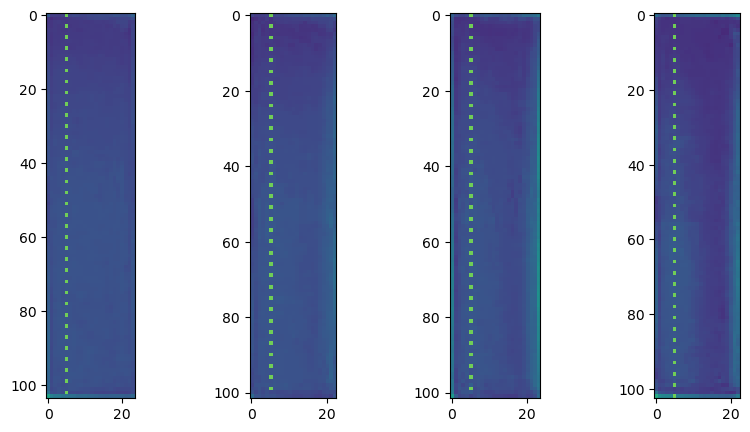

In [220]:
# test new version of get corrected_cell

il.reload(bs)

# _a27
basename = "2023-06-26_06-18-06_C50"
img_fpath = f"/home/ck/mnt/XAI-DIA-gl/Carsten/bilder_jpg2a/cropped/chunk000_stage1_completed/C0/{basename}.jpg"


ccia = bs.CavityCarrierImageAnalyzier(img_fpath)


cells = []


ii = [18, 25, 26, 27]

# ii = [1, 2, 3]


fig, axes = plt.subplots(1, len(ii), figsize=(10, 5))
for j, i in enumerate(ii):
    cell = ccia.get_corrected_cell("a", str(i), force_angle=None, cut_to_bb=True)
    cells.append(cell)
    cell.angle ##:
    
    cell[::3, 5] = 200
    axes[j].imshow(cell, **vv)
    



In [211]:
bs.aa.fitted_angles[("a", "3")]

-0.7316301185085614

In [214]:
ccia.angle_offset ##:

bs.aa.fitted_angles[("a", "2")] + ccia.angle_offset 

(ccia.angle_offset) := -0.05703724715069515

---

-0.7010476066535235

(cell.angle) := -0.5818183378366515

---

(cell.angle) := -0.6952700908966862

---

(cell.angle) := -0.7653658981012728

---

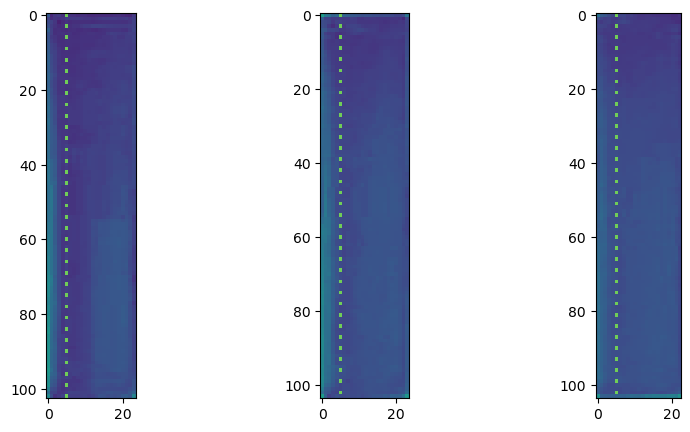

In [225]:
il.reload(bs)

# _a27
basename = "2023-06-26_06-18-31_C50"  # a24

basename = "2023-06-26_06-18-47_C50" # a3
img_fpath = f"/home/ck/mnt/XAI-DIA-gl/Carsten/bilder_jpg2a/cropped/chunk000_stage1_completed/C0/{basename}.jpg"


ccia = bs.CavityCarrierImageAnalyzier(img_fpath)


cells = []


ii = [24, 25, 26, 27]

ii = [1, 2, 3]


fig, axes = plt.subplots(1, len(ii), figsize=(10, 5))
for j, i in enumerate(ii):
    cell = ccia.get_corrected_cell("a", str(i), force_angle=None, cut_to_bb=True)
    cells.append(cell)
    cell.angle ##:
    
    cell[::3, 5] = 200
    axes[j].imshow(cell, **vv)

/home/ck/mnt/XAI-DIA-gl/Carsten/bilder_jpg2a/cropped/chunk000_stage1_completed/C0/2023-06-26_06-19-25_C50.jpg ('a', '4') 2.4067651189324697


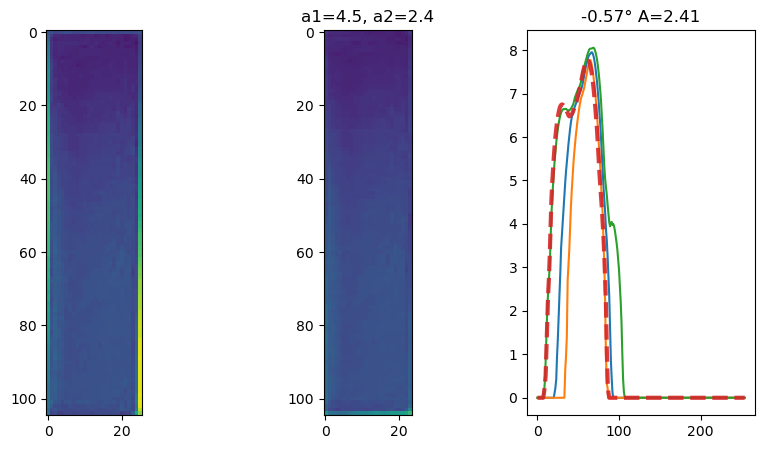

In [240]:
il.reload(bs)

basename = "2023-06-26_06-19-25_C50" # a4
img_fpath = f"/home/ck/mnt/XAI-DIA-gl/Carsten/bilder_jpg2a/cropped/chunk000_stage1_completed/C0/{basename}.jpg"



dict_fpath = f"dicts/hist_{basename}.dill"
# he.find_critical_cells_for_hist_dict(dict_fpath)
with open(dict_fpath, "rb") as fp:
    hist_dict = dill.load(fp)



tup = tuple("a 4".split())
bs.aa.available = True

he = bs.HistEvaluation()
he.evaluate_cell(img_fpath, tup, hist_dict, dc, plot="show", force_plot=True, recalc_hist=True)